In [1]:
import inspect
import re
from collections import Counter, defaultdict

import pandas as pd

In [11]:
df = pd.read_csv("filtered_token_breakdown.csv")
df

,script_path,script_tokens,.stack(,.timedelta_range(,.mask(,.is_dtype_equal(,.is_interval(,.pow(,.isocalendar(,.cummax(,...,.merge(,.is_type_compatible(,.nunique(,.pop(,.is_boolean(,.replace(,.check_for_ordered(,.is_mixed(,.repeat(,.ge(
0,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 2, 'pd': 2, '.read_csv(': 1}",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 3, 'pd': 1, '.append(': 2, '.min(':...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 2, 'pd': 4, '.stack(': 3, '.unstack...",3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 2, 'pd': 13, '.read_csv(': 2, '.inf...",0,0,0,0,0,0,0,0,...,1,0,0,0,0,2,0,0,0,0
4,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 1, 'pd': 4, '.join(': 1, '.iloc[': ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234200,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 1, 'pd': 10, '.read_csv(': 2, '.dro...",0,0,0,0,0,0,0,0,...,0,0,0,5,0,1,0,0,0,0
234201,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 1, 'pd': 5, '.mean(': 3}",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234202,../../pandas-api-analysis-private/data/big_dat...,"{'pandas': 1, '.fillna(': 1}",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234203,../../pandas-api-analysis-private/data/big_dat...,"{'pd': 2, 'pandas': 1, '.append(': 2}",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



## Count and Coverage Analysis

### Declare count and coverage DataFrames.

In [14]:
counts = pd.DataFrame(df.iloc[:, 2:].sum().reset_index())
counts.columns = ["method_name", "count"]

In [15]:
coverage = pd.DataFrame((~(df.iloc[:, 2:] == 0)).sum().reset_index())
coverage.columns = ["method_name", "coverage"]
coverage["coverage"] = coverage["coverage"] / len(df)

### Examine the top and bottom functions by count/coverage

In [17]:
counts.nlargest(25, "count")

,method_name,count
212,.append(,429290
131,.read_csv(,294494
66,.loc[,244266
169,.iloc[,135234
41,.drop(,133214
166,.groupby(,130897
183,.mean(,116908
62,.ix[,110651
135,.sum(,89339
299,.replace(,85820


In [18]:
counts.nsmallest(25, "count")

,method_name,count
3,.is_dtype_equal(,0
4,.is_interval(,0
10,.read_xml(,0
13,.asof_locs(,0
30,.is_numeric(,0
32,.set_codes(,0
37,.putmask(,0
38,.holds_integer(,0
40,.read_orc(,0
43,.is_categorical(,0


In [19]:
coverage.nlargest(25, "coverage")

,method_name,coverage
131,.read_csv(,0.616042
212,.append(,0.386495
41,.drop(,0.204688
66,.loc[,0.187810
183,.mean(,0.185974
166,.groupby(,0.182678
169,.iloc[,0.141188
135,.sum(,0.139566
256,.concat(,0.136526
75,.apply(,0.115057


In [20]:
coverage.nsmallest(25, "coverage")

,method_name,coverage
3,.is_dtype_equal(,0.0
4,.is_interval(,0.0
10,.read_xml(,0.0
13,.asof_locs(,0.0
30,.is_numeric(,0.0
32,.set_codes(,0.0
37,.putmask(,0.0
38,.holds_integer(,0.0
40,.read_orc(,0.0
43,.is_categorical(,0.0


In [21]:
middle_core_length = len(counts[counts["count"] > 2])
print(
    "If we take out functions that have not been used by more than two notebooks,"
    + f" we are left with a very large middle core of {middle_core_length} functions."
)

If we take out functions that have not been used by more than two notebooks, we are left with a very large middle core of 248 functions.


In [22]:
counts[counts["count"] > 2].nsmallest(15, "count")

,method_name,count
149,.from_frame(,3
179,.lag_plot(,3
186,.radd(,3
209,.andrews_curves(,3
272,.rmul(,3
52,.truediv(,4
258,.read_feather(,4
301,.is_mixed(,4
8,.to_native_types(,5
24,.rsub(,5


### Visualize the count and coverage as histograms.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f993c5120a0>],
      dtype=object)

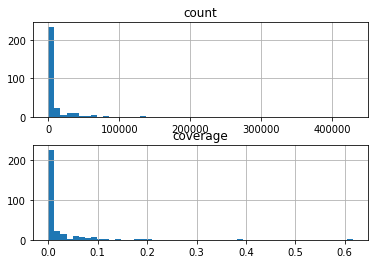

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1)
counts.hist(bins=50, ax=axes[0])
coverage.hist(bins=50, ax=axes[1])

### Breakdown of coverage percentage

In [24]:
coverage["bins"] = pd.cut(
    coverage.coverage,
    bins=(0, 0.01, 0.05, 0.1, 0.65),
    labels=["0-1%", "1-5%", "5-10%", "10-65%"],
    right=False,
)

In [25]:
coverage["bins"].value_counts()

0-1%      224
1-5%       41
5-10%      25
10-65%     14
Name: bins, dtype: int64

### Number of functions in a notebook

In [26]:
num_func = df.iloc[:, 2:-1].sum(axis=1)
num_func.mean()

16.05060523900002

In [27]:
num_func.median()

10.0

In [28]:
num_func.max()

1602

## Cumulative Distribution based on Rank

The idea behind computing cumulative coverage is that we want to find the _least_ common function for each script. If we know the least common function for each script, then we know at what point our cumulative coverage will cover that script entirely.

The algorithm is:
1. Sort the columns by descreasing coverage (most to least common).
2. For each row, find the rank (rank 1 = most common) of the least common function, which is the `least_common_rank`.
3. Group by and count the `least_common_ranks` of all columns. This gives us a mapping of `least_common_rank` to `count`. When sorted by rank, the mapping of `least_common_rank` to `count` tells us, for each function __x__ (if iterating in increasing rank) how many __additional__ scripts are covered by __x__.
4. With the mapping sorted by rank, we compute the cumulative sum, which gives us a mapping of `least_common_rank` to `cumulative_count` where `cumulative_count` is now the number of scripts that are covered by `least_common_rank` functions or __less__. As a sanity check, the `cumulative_count` of the least common function should be equal to the total number of scripts.
5. With the cumulative sum mapping, we can divide each `count` by the total number of scripts to get a cumulative percentage.

In [30]:
# (1) Get the top functions, sorted.
ordered_top_funcs = list(
    coverage.sort_values("coverage", ascending=False)["method_name"]
)
print(len(ordered_top_funcs))

top_funcs_df = df[ordered_top_funcs]
top_funcs_df

304


,.read_csv(,.append(,.drop(,.loc[,.mean(,.groupby(,.iloc[,.sum(,.concat(,.apply(,...,.equal_levels(,.rmod(,.month_name(,.is_object(,.is_numeric(,.rdivmod(,.deregister_matplotlib_converters(,.register_matplotlib_converters(,.to_perioddelta(,.set_closed(
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,5,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234200,2,4,10,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234201,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234203,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
"""
Helper that returns the rank of the least common function
that is in a row/script. This rank corresponds to the rank
where the entire script's functions are covered.
"""


def least_common_function_rank(row):
    for i, val in reversed(list(enumerate(row))):
        if val != 0:
            return int(i + 1)

In [32]:
# (2) For each row, find the rank (rank 1 = most common) of the least common function, which is the least_common_rank.
least_common_ranks = top_funcs_df.apply(
    lambda row: least_common_function_rank(row), axis=1
)
least_common_ranks

0          1
1         54
2         84
3         99
4         20
          ..
234200    60
234201     5
234202    22
234203     2
234204    93
Length: 234205, dtype: int64

In [33]:
"""
(3) Group by and count the least_common_ranks of all columns. This gives us a mapping of
least_common_rank to count. When sorted by rank, the mapping of least_common_rank to
count tells us, for each function x (if iterating in increasing rank) how many 
additional scripts are covered by x.

NOTE: This does not have to be monotonically increasing.
Imagine the function rank is: 1. read_csv 2. plot 3. mean 4. to_csv and there are
only two types of users, ones who use read_csv and plot, and ones who use read_csv,
mean, to_csv. read_csv is the most common function, used in all scripts. However, its
least_common_ranks_count would be 0, since everyone who uses read_csv also uses
another less common function.
"""
least_common_ranks_count = least_common_ranks.groupby(least_common_ranks).count()
least_common_ranks_count

1      8648
2      6253
3      2558
4      1201
5      1240
       ... 
255       1
256       1
257       1
258       1
259       1
Length: 259, dtype: int64

In [34]:
"""
(4) With the mapping sorted by rank, we compute the cumulative sum, which gives 
us a mapping of least_common_rank to cumulative_count where cumulative_count is
now the number of scripts that are covered by least_common_rank functions or 
less. As a sanity check, the cumulative_count of the least common function
should be equal to the total number of scripts.
"""

least_common_ranks_cumulative_count = (
    least_common_ranks_count.cumsum()
)  # Get the cumulative sum of the series.
print(least_common_ranks_cumulative_count.iloc[-1])
assert (
    least_common_ranks_cumulative_count.iloc[-1] == df.shape[0]
), "The cumulative sum of the least common function should be equal to the number of rows."
least_common_ranks_cumulative_count

234205


1        8648
2       14901
3       17459
4       18660
5       19900
        ...  
255    234201
256    234202
257    234203
258    234204
259    234205
Length: 259, dtype: int64

In [35]:
"""
(5) With the cumulative sum mapping, we can divide each count
by the total number of scripts to get a cumulative percentage.
"""

coverage_rank_cumulative_perc = least_common_ranks_cumulative_count / df.shape[0] * 100
coverage_rank_cumulative_perc

1        3.692492
2        6.362375
3        7.454580
4        7.967379
5        8.496830
          ...    
255     99.998292
256     99.998719
257     99.999146
258     99.999573
259    100.000000
Length: 259, dtype: float64

In [36]:
k = 3
pct = coverage_rank_cumulative_perc.iloc[k]
print(f"Top k func: {pct:.2f}%, {int(pct*df.shape[0]/100)} notebooks")

Top k func: 7.97%, 18660 notebooks


In [37]:
k = 50
pct = coverage_rank_cumulative_perc.iloc[k]
print(f"Top k func: {pct:.2f}%, {int(pct*df.shape[0]/100)} notebooks")

Top k func: 51.02%, 119494 notebooks


In [41]:
k = 177
pct = coverage_rank_cumulative_perc.iloc[k]
print(f"Top k func: {pct:.2f}%, {int(pct*df.shape[0]/100)} notebooks")

Top k func: 99.04%, 231956 notebooks


(0.0, 105.0)

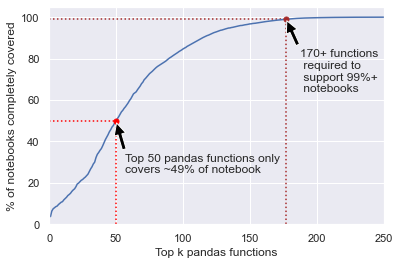

In [42]:
import seaborn as sns

sns.set_theme()
coverage_rank_cumulative_perc.plot()

y_pt = coverage_rank_cumulative_perc.iloc[50 - 1]

plt.xlabel("Top k pandas functions")
plt.ylabel("% of notebooks completely covered")
plt.annotate(
    f"Top 50 pandas functions only \ncovers ~{int(y_pt)}% of notebook",
    xy=(50, y_pt),
    xycoords="data",
    xytext=(57, y_pt - 25),
    textcoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
)

plt.hlines(y_pt, xmin=0, xmax=50, linestyle="dotted", color="red")
plt.vlines(50, ymin=0, ymax=y_pt, linestyle="dotted", color="red")
plt.plot(50, y_pt, marker=".", markersize=10, color="red")

y_pt = 99
x_pt = 177
plt.hlines(y_pt, xmin=0, xmax=x_pt, linestyle="dotted", color="brown")
plt.vlines(x_pt, ymin=0, ymax=y_pt, linestyle="dotted", color="brown")
plt.plot(x_pt, y_pt, marker=".", markersize=10, color="brown")
plt.annotate(
    f"170+ functions\n required to\n support 99%+\n notebooks",
    xy=(x_pt, y_pt),
    xycoords="data",
    xytext=(x_pt + 10, y_pt - 35),
    textcoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
)


plt.xlim(0, 250)
plt.ylim(0, 105)